In [1]:
using Images, BenchmarkTools, CairoMakie, Wavelets, FFTW
using TestImages
using NAJ

In [3]:
wt = wavelet(WT.Daubechies{15}())
img = load("cameraman.tif")
function mdwt2(img::Matrix, wavelet, level=nothing)
    if level == nothing
        A = dwt(img0, wavelet)
    else
        A = dwt(img0, wavelet, level)
    end
    m1, m2 = (size(A)[1:2]) .>> 1
    return A[1:m1, 1:m2], A[1:m1, (m2+1):end], A[(m1+1):end, 1:m2], A[(m1+1):end, (m2+1):end]
end
#save("cameraman.tif", img)

mdwt2 (generic function with 2 methods)

In [15]:
f=Figure()
image(f[1, 1], img', axis=(yreversed=true,), aspect=DataRatio())
f

UndefVarError: UndefVarError: `DataRatio` not defined

In [4]:
img0 = round.(Int64, img*255);

In [5]:
LL, LH, HL, HH = mdwt2(img0, wt, 1)
imgt = dwt(img0, wt, 1)

512×512 Matrix{Float64}:
 313.724     312.161    313.345    …  -0.554464   -0.590713  -0.223071
 316.038     310.311    311.298        0.841762   -1.59095    0.241
 309.601     314.356    314.287       -0.793345   -0.703281   1.02076
 306.706     314.013    317.604        0.0730634  -0.855775  -0.448428
 309.137     312.18     309.008        0.697826   -1.56675   -0.0712738
 308.99      314.853    309.534    …  -0.969818   -0.602627  -0.454393
 314.897     312.107    308.445        0.349147   -2.80639    1.77257
 313.37      310.261    310.657        0.148715   -1.56928    0.959487
 313.355     314.405    319.217       -1.4716     -0.97689    0.769349
 311.66      312.549    307.985       -0.548252   -1.1079     0.799319
   ⋮                               ⋱               ⋮         
   3.26969     3.70346    8.85815      0.675422   -1.11077    0.846343
  -2.74962    -6.32993   -9.68511     -1.24662     0.701918  -1.15782
   8.57212    10.2752    12.6911   …   1.15157    -0.987258   1.01

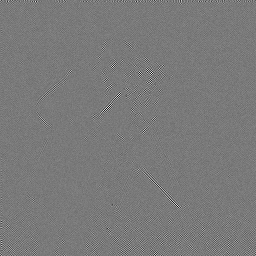

In [92]:
mm, MM = extrema(HH)
Gray.((HH.-mm)./(MM-mm))

In [81]:
size(HH)

(256, 256)

In [ ]:
heatmap(idwt(imgt, wt))

In [21]:
wt = wavelet(WT.Daubechies{15}())

OrthoFilter{Wavelets.WT.PerBoundary}([0.004538537361578899, 0.04674339489276628, 0.20602386398699576, 0.4926317717081399, 0.6458131403574253, 0.3390025354547311, -0.193204139609141, -0.2888825965669633, 0.06528295284876239, 0.19014671400714178  …  0.001943323980382135, -0.00037348235413758407, -0.0003595652443624814, 0.0001558964899206034, 2.579269915531856e-5, -2.8133296266047895e-5, 3.3629871817375944e-6, 1.8112704079405825e-6, -6.316882325881684e-7, 6.133359913305768e-8], "db15")

In [30]:
function mdwt2(img::Matrix, wavelet)
    A = dwt(img0, wt )
    m1, m2 = (size(A)[1:2]) .>> 1
    return A[1:m1, 1:m2], A[1:m1, (m2+1):end], A[(m1+1):end, 1:m2], A[(m1+1):end, (m2+1):end]
end

mdwt2 (generic function with 1 method)

In [32]:
cA, cH, cV, cD = mdwt2(img0, wt)

(Float32[237.55605 -48.987152 … -0.0070486655 0.021139499; 1.8218865 -32.399612 … -0.028448826 -0.012769595; … ; 0.023566168 -0.05449733 … 0.0032928397 0.030791944; -0.07248351 0.035294276 … 0.02720632 -0.021557957], Float32[-0.0015620684 -0.009712792 … -0.002316501 -0.00087478844; -0.0020265188 -0.00819263 … -0.0062390217 0.0009451122; … ; 0.0039918637 -0.011189378 … -0.011696519 -0.0017449303; -0.0028490243 -0.011099208 … -0.005977976 -0.0016283724], Float32[-0.011168465 0.039328028 … 0.006974405 -0.010209926; -0.06333383 -0.022730924 … -0.078540795 -0.06583832; … ; -0.0031935512 0.0053357 … 0.009599369 0.00082801376; 0.0066616703 -0.026218167 … -0.011846254 0.004144227], Float32[0.008052883 -0.010560808 … 0.0011051968 -0.0062496206; -0.005128463 0.005088048 … -0.0035354148 0.0035893023; … ; 0.010407173 -0.012083828 … 0.006316377 -0.011359576; -0.010610666 0.012585511 … -0.0048481287 0.009068293])

In [33]:
cA

256×256 Matrix{Float32}:
 237.556      -48.9872     -27.3977     …  -0.00704867   0.0211395
   1.82189    -32.3996       1.53395       -0.0284488   -0.0127696
  11.1049      45.2814      21.387         -0.0317078   -0.00624743
 -14.081      -23.93       -14.5935         0.0153289   -0.0340663
   6.78499     -5.94682     11.9146        -0.00901086  -0.00820614
  -1.94185     -3.52841     -7.86389    …  -0.0101251    0.0110396
   5.75776     10.3893       9.70617        0.0243228   -0.00935099
   4.58926     -4.58909     -2.70026        0.00857192   0.0222435
  -4.87864     -1.23622      1.48092        0.00879294  -0.00514453
   0.540817    -3.89433     -3.28659       -0.00490616  -0.00186116
   ⋮                                    ⋱                ⋮
   0.0438979   -0.0994465   -0.10572       -0.0122053    0.0240592
   0.0707321    0.129716    -0.0541313     -0.00630527  -0.0481173
  -0.175537    -0.138154     0.0344116     -0.0181106    0.110557
   0.212699    -0.0631356    0.111553   …

In [25]:
wt

OrthoFilter{Wavelets.WT.PerBoundary}([0.004538537361578899, 0.04674339489276628, 0.20602386398699576, 0.4926317717081399, 0.6458131403574253, 0.3390025354547311, -0.193204139609141, -0.2888825965669633, 0.06528295284876239, 0.19014671400714178  …  0.001943323980382135, -0.00037348235413758407, -0.0003595652443624814, 0.0001558964899206034, 2.579269915531856e-5, -2.8133296266047895e-5, 3.3629871817375944e-6, 1.8112704079405825e-6, -6.316882325881684e-7, 6.133359913305768e-8], "db15")